**Import Library dan Dataset**

In [ ]:
# Libraries

import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import locale
from dateutil import tz
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
# Import Dataset

df = pd.read_csv("/content/drive/MyDrive/Orbit/Final Project/Brand_Reviews.csv",
                 encoding = 'latin1')
print(df.head)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of        product_id       brand_name  review_id  \
0          781070             Olay   16752142   
1          781070             Olay   14682550   
2          781070             Olay   15618995   
3          781070             Olay   13474509   
4          781070             Olay   16338982   
...           ...              ...        ...   
61279     1044490  Herbal Essences   17769058   
61280     1044490  Herbal Essences   17766838   
61281     1044490  Herbal Essences   17765866   
61282     1044490  Herbal Essences   17761057   
61283     4633369         Colorbar   25987603   

                              review_title  \
0                     Worth buying 50g one   
1               Best cream to start ur day   
2      perfect for summers dry for winters   
3                        Not a moisturizer   
4                                  Average   
...                                    ...   
61279                                 Good   
61280        

In [ ]:
# Membuat Tabel Data

df = df[['review_date','author','brand_name','product_title','price',
             'review_rating','product_rating']]
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_date,author,brand_name,product_title,price,review_rating,product_rating
0,2021-01-23 15:17:18,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1
1,2020-09-07 15:30:42,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1
2,2020-11-13 12:24:14,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,4.1
3,2020-06-14 11:56:50,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,4.1
4,2020-12-22 15:24:35,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,4.1
...,...,...,...,...,...,...,...
61279,2021-04-12 13:28:41,Radhesh,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61280,2021-04-12 11:47:07,Shalini Sirohi,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61281,2021-04-12 10:58:34,Sana kanted,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3
61282,2021-04-11 21:44:55,neeru chouhan,Herbal Essences,Herbal Essences Aloe & Eucalyptus Shampoo For ...,525,5.0,4.3


In [ ]:
# Mengatur Tanggal-Waktu
df['review_date'] = pd.to_datetime(df['review_date'])
bins1 = pd.to_datetime(['00:00:00', '12:00:00', '18:00:00', '23:59:59'])
df['Jam'] = df['review_date'].dt.hour
df['Waktu'] = pd.cut(df['Jam'], bins=[0, 12, 18, 24],
                     labels=['Pagi', 'Siang', 'Malam'])

# Mengatur Timezone UTC
df['review_date'] = df['review_date'].dt.tz_localize(tz.UTC)

# Convert to desired timezone (e.g. Asia/Jakarta)
df['review_date'] = df['review_date'].dt.tz_convert(tz.gettz('Asia/Jakarta'))

# Extract day name, month name, and year
df['Hari'] = df['review_date'].dt.day_name()
df['Bulan'] = df['review_date'].dt.month_name()
df['Tahun'] = df['review_date'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menampilkan Isi Dataset
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_date,author,brand_name,product_title,price,review_rating,product_rating,Jam,Waktu,Hari,Bulan,Tahun
0,2021-01-23 22:17:18+07:00,Ashton Dsouza,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1,15,Siang,Saturday,January,2021
1,2020-09-07 22:30:42+07:00,Amrit Neelam,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,5.0,4.1,15,Siang,Monday,September,2020
2,2020-11-13 19:24:14+07:00,Sanchi Gupta,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,4.0,4.1,12,Pagi,Friday,November,2020
3,2020-06-14 18:56:50+07:00,Ruchi Shah,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,3.0,4.1,11,Pagi,Sunday,June,2020
4,2020-12-22 22:24:35+07:00,Sukanya Sarkar,Olay,Olay Ultra Lightweight Moisturiser: Luminous W...,1599,2.0,4.1,15,Siang,Tuesday,December,2020


In [ ]:
# Mencari Nilai Null di Dataset
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review_date          0
author               0
brand_name           0
product_title        0
price                0
review_rating        1
product_rating       0
Jam                  0
Waktu             2258
Hari                 0
Bulan                0
Tahun                0
dtype: int64

In [ ]:
# Menghapus Nilai yang Null
df.to_csv('clean.csv')
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Melihat Kolom yang Ada di Dataset
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['review_date', 'author', 'brand_name', 'product_title', 'price',
       'review_rating', 'product_rating', 'Jam', 'Waktu', 'Hari', 'Bulan',
       'Tahun'],
      dtype='object')

In [ ]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59025 entries, 0 to 61283
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype                                                     
---  ------          --------------  -----                                                     
 0   review_date     59025 non-null  datetime64[ns, tzfile('/usr/share/zoneinfo/Asia/Jakarta')]
 1   author          59025 non-null  object                                                    
 2   brand_name      59025 non-null  object                                                    
 3   product_title   59025 non-null  object                                                    
 4   price           59025 non-null  int64                                                     
 5   review_rating   59025 non-null  float64                                                   
 6   product_rating  59025 non-null  float64                                                   
 7   Jam             59025 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Melihat Nilai Rating pada Review
df['review_rating'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5.0    40156
4.0    10884
3.0     3407
1.0     2938
2.0     1640
Name: review_rating, dtype: int64

In [ ]:
# Menampilkan jumlah Nama Brand
pd.DataFrame(df['brand_name'].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,brand_name
Nykaa Cosmetics,17069
Kay Beauty,13318
Lakme,6739
Maybelline New York,6545
Herbal Essences,5936
L'Oreal Paris,4084
NYX Professional Makeup,2827
Nykaa Naturals,1372
Nivea,753
Olay,381


In [ ]:
# Menampilkan jumlah Product Title
pd.DataFrame(df['product_title'].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_title
Kay Beauty Waterproof 24 Hour Kajal - Spade - Black,783
Kay Beauty Nail Nourish Nail Enamel Polish,779
Kay Beauty Metallic Eyeshadow Stick Pencil,778
Kay Beauty Matteinee Matte Lip Crayon Lipstick,776
Kay Beauty Matte Blush,776
...,...
Get Party Ready With Kay Beauty Lip Liner - Dance Off & Matte Lipstick - Premier,1
Kay Beauty Pastel Perfection Nail Enamel Combo,1
Kay Beauty Nail Nourish Nail Emanel Combo - Carnival & Wine Berry,1
Kay Beauty Pastel Crush Nail Enamel Combo- Tender Lavender + Aspire + Pink Gem,1


In [ ]:
# Menampilkan Author
df['author'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anonymous             150
Priyanka Prakash       99
X Y                    87
Damon Salvatore        81
Priya Pawar            76
                     ... 
Mythri Rao              1
Nitisha S               1
akriti                  1
Gagu                    1
Soujanya Garlapati      1
Name: author, Length: 40348, dtype: int64

In [ ]:
# Menghitung Frekuensi Kemunculan Masing-masing Author yang Paling Jarang Muncul
pd.DataFrame(df.author.value_counts()).tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,author
Mythri Rao,1
Nitisha S,1
akriti,1
Gagu,1
Soujanya Garlapati,1


In [ ]:
## Menghapus Baris Dataframe yang Frekuensinya Sedikit

# Menghitung Frekuensi Kemunculan Nilai Kolom Author
counts = df['author'].value_counts()

# Mengambil Indeks yang Memiliki Nilai yang Kurang dari 25
to_remove = counts[counts < 25].index.tolist()

# Menghapus Baris-baris dari Dataframe
df.drop(df[df['author'].isin(to_remove)].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-a33cf6a43c85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['author'].isin(to_remove)].index, inplace=True)


In [ ]:
!pip install pandas_profiling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=eea88a282863b4016237ebc48cf309eb74854d778f24883b4f2ebf68fe9cb522
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [ ]:
import pandas_profiling

report = pd.ProfileReport(df)
display(report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ImportError: ignored

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0, 0, 'Kay Beauty Matte Drama Long Stay Lipstick'),
 Text(1, 0, 'Kay Beauty Matte Compact'),
 Text(2, 0, 'Lakme Absolute Kohl Ultimate The Gelato Collection'),
 Text(3, 0, 'Kay Beauty Illuminating Highlighter'),
 Text(4, 0, 'Kay Beauty Hd Liquid Concealer'),
 Text(5, 0, 'Kay Beauty Eyeshadow Palette'),
 Text(6, 0, 'Lakme Absolute Plush Matte Lip Crayon'),
 Text(7, 0, 'Kay Beauty Creme Blush'),
 Text(8, 0, 'Nykaa Matte to Last! Mini Metallic Liquid Lipstick and Eyeshadow'),
 Text(9, 0, 'Kay Beauty Colour Correcting Primer')]

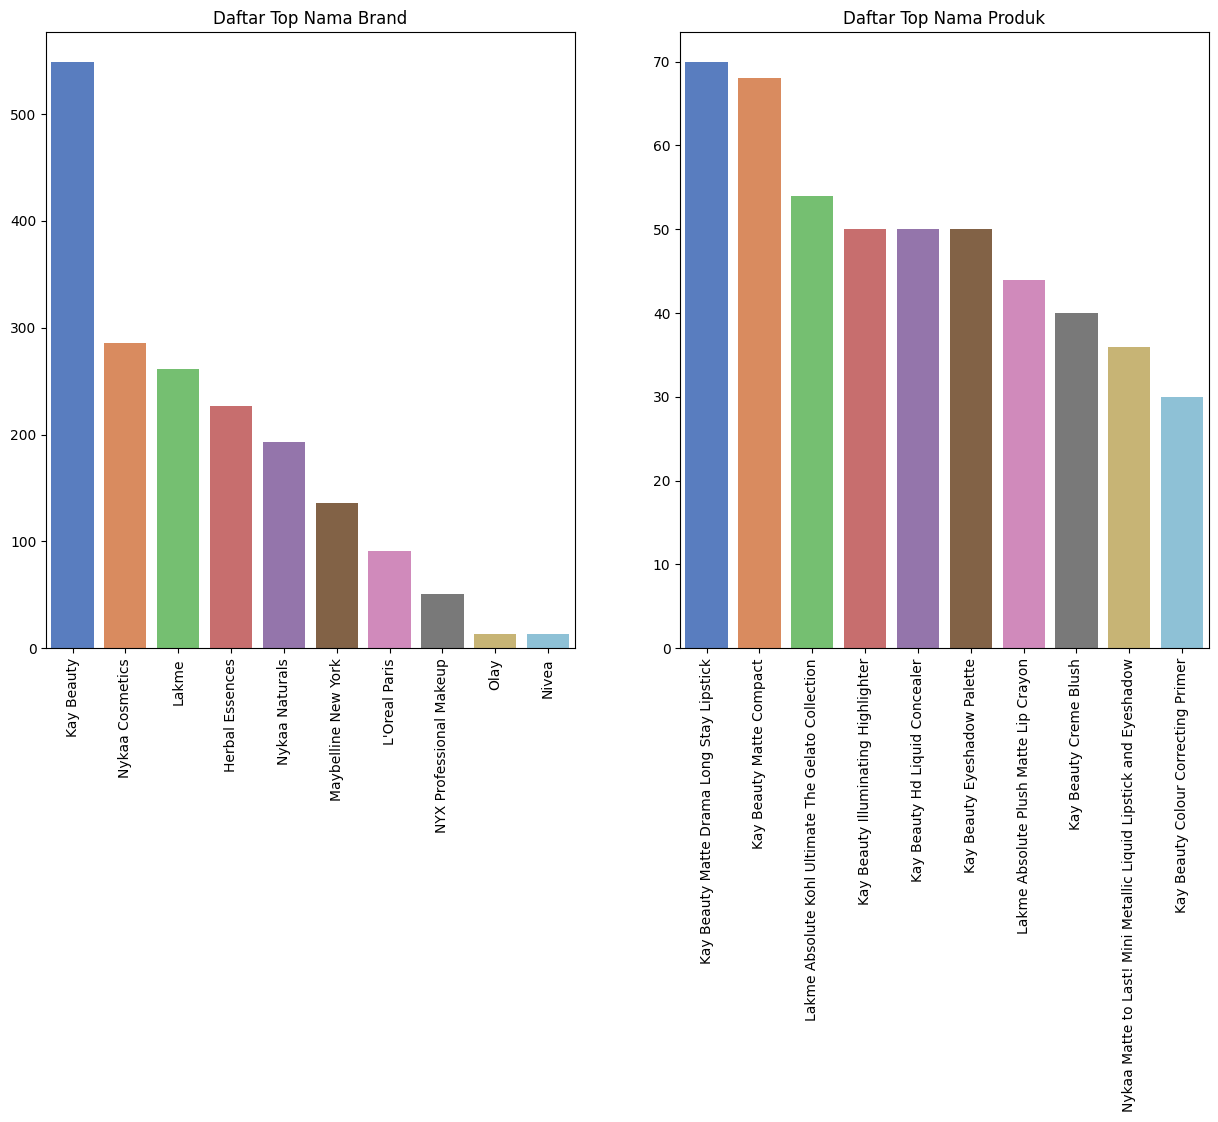

In [ ]:
# Visualisasi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.set_palette('muted')

sns.barplot(x = df['brand_name'].value_counts()[:10].index,
            y = df['brand_name'].value_counts()[:10].values,ax = ax1)
ax1.set_title('Daftar Top Nama Brand')
ax1.set_xticklabels(df['brand_name'].value_counts()[:10].index,rotation=90)

sns.barplot(x = df['product_title'].value_counts()[:10].index,
            y = df['product_title'].value_counts()[:10].values, ax = ax2)
ax2.set_title('Daftar Top Nama Produk')
ax2.set_xticklabels(df['product_title'].value_counts()[:10].index,rotation=90)

# plt.xlabel(""); plt.ylabel("")
# plt.xticks(size = 8, rotation = 45)
# plt.title('Daftar Urutan Tertinggi Nama Brand',size = 15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Total Review Product per Jam')

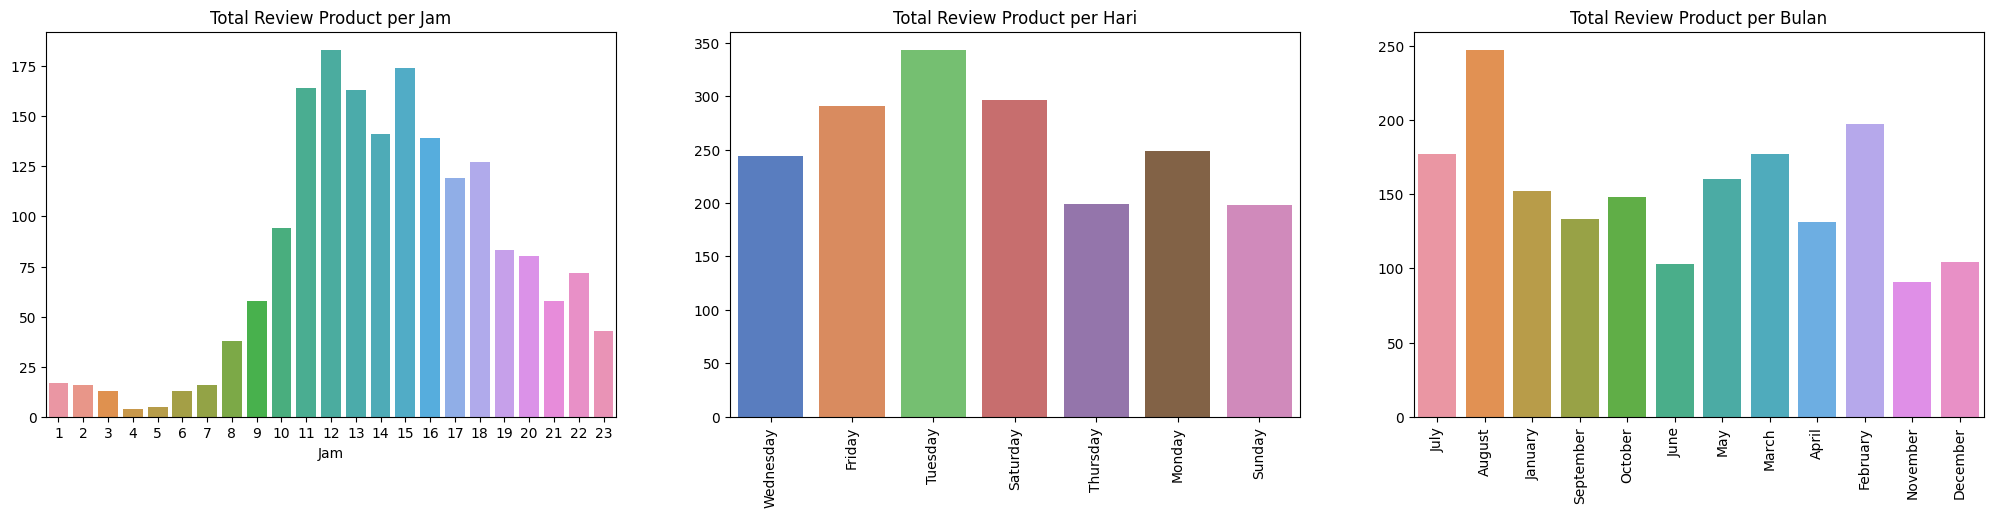

In [ ]:
df_hari = df.groupby('Hari')['author'].count()
df_hari = pd.concat([df_hari.iloc[4:], df_hari.iloc[:4]])

df_bulan = df.groupby('Bulan')['author'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

df_jam = df.groupby('Jam')['author'].count()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))

sns.barplot(x = df['Hari'].unique(), y = df_hari.values, ax = ax2)
ax2.set_title('Total Review Product per Hari')
ax2.set_xticklabels(df['Hari'].value_counts()[:10].index,rotation=90)

sns.barplot(x = df['Bulan'].unique(), y = df_bulan.values,ax = ax3)
ax3.set_title('Total Review Product per Bulan')
ax3.set_xticklabels(df['Bulan'].value_counts().index,rotation=90)

sns.barplot(x = df_jam.index, y = df_jam.values, ax = ax1)
ax1.set_title('Total Review Product per Jam')
# ax1.set_xticklabels(df['jam'].value_counts().index,rotation=90)

In [ ]:
item_count_pivot = df.pivot_table(index='author',columns='product_title',
                                  values= 'review_rating',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_title,Get Party Ready With Kay Beauty Lip Liner - Dance Off & Matte Lipstick - Premier,Herbal Essences Aloe & Bamboo Conditioner Soft Smooth Hair- No- Sulphates and Paraben(400gm),"Herbal Essences Aloe & Bamboo Shampoo + Conditioner For Soft Smooth Hair, No Sulphates & Paraben","Herbal Essences Aloe & Bamboo Shampoo For Soft Smooth Hair, No-Sulphates, Paraben and Silicones","Herbal Essences Aloe & Eucalyptus Shampoo + Aloe & Bamboo Conditioner, No- Sulphates & Paraben","Herbal Essences Aloe & Eucalyptus Shampoo For Soft Smooth Hair, No- Sulphates, Paraben and Silicones",Herbal Essences Argan 2 Shampoo + Conditioner,Herbal Essences Argan Oil Of Moroccan Shampoo & Conditioner With Free Neem Comb,Herbal Essences Argan Oil Of Morocco Conditioner - For Frizz Free Hair - Paraben Free,Herbal Essences Argan Oil Of Morocco Shampoo - For Frizz Free Hair - Paraben Free,"Herbal Essences Argan Oil Shampoo & Conditioner For Frizz - No Parabens, No Colourants",Herbal Essences Bio:Renew Hydrate Coconut Milk Conditioner,Herbal Essences Bio:Renew Strength Whipped Cocoa Butter Conditioner,Herbal Essences Cocoa Butter 2 Shampoo + Conditioner,"Herbal Essences Cocoa Butter Shampoo & Conditioner For Hair Strengthening - No Parabens, No Colourants","Herbal Essences Cocoa Butter Shampoo For Hair Strengthening - No Parabens, No Colourants",Herbal Essences Coconut 2 Shampoo + Conditioner,"Herbal Essences Coconut Milk Shampoo & Conditioner For Hydration & Softness - No Parabens, No Colourants",Herbal Essences Coconut Milk Shampoo For Hydration & Softness - No Parabens- No Colourants,Herbal Essences Strawberry & Mint Conditioner - For Cleansing & Volume - Paraben Free,Herbal Essences Strawberry & Mint Shampoo - For Cleansing & Volume - Paraben Free,Herbal Essences Strawberry 2 Shampoo + Conditioner,"Herbal Essences Strawberry Shampoo & Conditioner For Volume - No Parabens, No Colourants",Herbal Essences Strawberry Shampoo + Strawberry Conditioner,Kat's Bold Night Look - Kay Beauty Matte Lipstick & Liquid Eyeliner,Kay Beauty Cocktail Hour Combo - Gel Eye Pencils In Gold & Olive,Kay Beauty Colour Correcting Primer,Kay Beauty Colour Corrector Stick,Kay Beauty Contour Stick,Kay Beauty Creme Blush,Kay Beauty Eyeshadow Palette,Kay Beauty Gel Eye Pencil,Kay Beauty Glittery Glam Nails Look With Kay Beauty Nail Enamel Nail Polish,Kay Beauty HD Liquid Colour Corrector,Kay Beauty HD Translucent Loose Powder - White,Kay Beauty Hd Liquid Concealer,Kay Beauty Hydrating Foundation,Kay Beauty Illuminating Highlighter,Kay Beauty Island Vibes Combo - Gel Eye Pencils In Blue & Green,Kay Beauty Lip & Cheek Combo,Kay Beauty Matte Action Lip Liner,Kay Beauty Matte Blush,Kay Beauty Matte Compact,Kay Beauty Matte Drama Long Stay Lipstick,Kay Beauty Matte HD Setting Loose Powder,Kay Beauty Matte Lips Combo - Lip Crayon - Wee Hours & Matte Lipstick - Backstage,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Kay Beauty Metallic Eyeshadow Stick Pencil,Kay Beauty Nail Nourish Nail Emanel Combo - Carnival & Wine Berry,Kay Beauty Nail Nourish Nail Enamel Polish,Kay Beauty Paint Your Mood Nail Enamel Combo,Kay Beauty Quick Dry Liquid Eyeliner,Kay Beauty Shine On Combo - Gel Eye Pencils In Bronze & Green,Kay Beauty Ultra Black Volume & Length Mascara - Midnight,Kay Beauty Waterproof 24 Hour Kajal - Spade - Black,L'Oreal Paris Age 20+ Skin Perfect Cream UV Filters,L'Oreal Paris Casting Creme Gloss Ultra Visible Conditioning Hair Color,L'Oreal Paris Excellence Fashion Highlights Hair Color,L'Oreal Paris Flash Cat Eye Eyeliner - Black,L'Oreal Paris Glycolic Bright Day Regime,L'Oreal Paris Infallible Gel Crayon Eyeliner,L'Oreal Paris Infallible Le Rouge Lipstick,L'Oreal Paris Infallible Mega Gloss,L'Oreal Paris Infallible Pro-Spray & Set Makeup Extender,L'Oreal Paris Infallible Ultra Matte Liquid Les Macarons Lipstick,L'Oreal Paris Magic Retouch Instant Root Concealer Spray,L'Oreal Paris Matte Signature Eyeliner,L'Oreal Paris Superliner Black Lacquer,L'Oreal Paris True Match BB Cream,

In [ ]:
# Keterangan Olah Dataset
print('Dimensi Dataset :',item_count_pivot.shape)
print('Jumlah Reviewer Item :',item_count_pivot.shape[0])
print('Jumlah Item :',item_count_pivot.shape[1])

Dimensi Dataset : (41, 220)
Jumlah Reviewer Item : 41
Jumlah Item : 220


In [ ]:
freq = apriori(item_count_pivot, min_support= 0.15, use_colnames= True)
freq.sort_values('support',ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
22,0.512195,(Kay Beauty Matte Compact)
16,0.487805,(Kay Beauty Eyeshadow Palette)
40,0.439024,(Lakme Kajal - Black)
34,0.439024,(Lakme Absolute Kohl Ultimate The Gelato Colle...
21,0.439024,(Kay Beauty Illuminating Highlighter)


In [ ]:
rules = association_rules(freq,metric='confidence',min_threshold=1)[['antecedents'
,'consequents','support','confidence','lift']]

rules.sort_values(by=['support','confidence','lift'],ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
40,"(Kay Beauty Matte Compact, Lakme Absolute Kohl...",(Kay Beauty Eyeshadow Palette),0.268293,1.0,2.050000
37,(Kay Beauty Ultra Black Volume & Length Mascar...,(Kay Beauty Matte Compact),0.243902,1.0,1.952381
31,"(Kay Beauty Hd Liquid Concealer, Lakme Absolut...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
33,"(Kay Beauty Hd Liquid Concealer, Nykaa Matte t...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
35,(Nykaa SKINgenius Skin Perfecting & Hydrating ...,(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
129,"(Kay Beauty Matte Compact, Kay Beauty Ultra Bl...",(Kay Beauty Eyeshadow Palette),0.219512,1.0,2.050000
12,"(Kay Beauty Creme Blush, Kay Beauty Eyeshadow ...",(Kay Beauty Matte Compact),0.219512,1.0,1.952381
128,(Lakme Absolute Kohl Ultimate The Gelato Colle...,(Kay Beauty Matte Compact),0.219512,1.0,1.952381
76,"(Kay Beauty Matte Compact, Kay Beauty Gel Eye ...","(Kay Beauty Creme Blush, Kay Beauty Eyeshadow ...",0.195122,1.0,4.555556
58,"(Kay Beauty Illuminating Highlighter, Kay Beau...",(Kay Beauty Hd Liquid Concealer),0.195122,1.0,2.928571


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


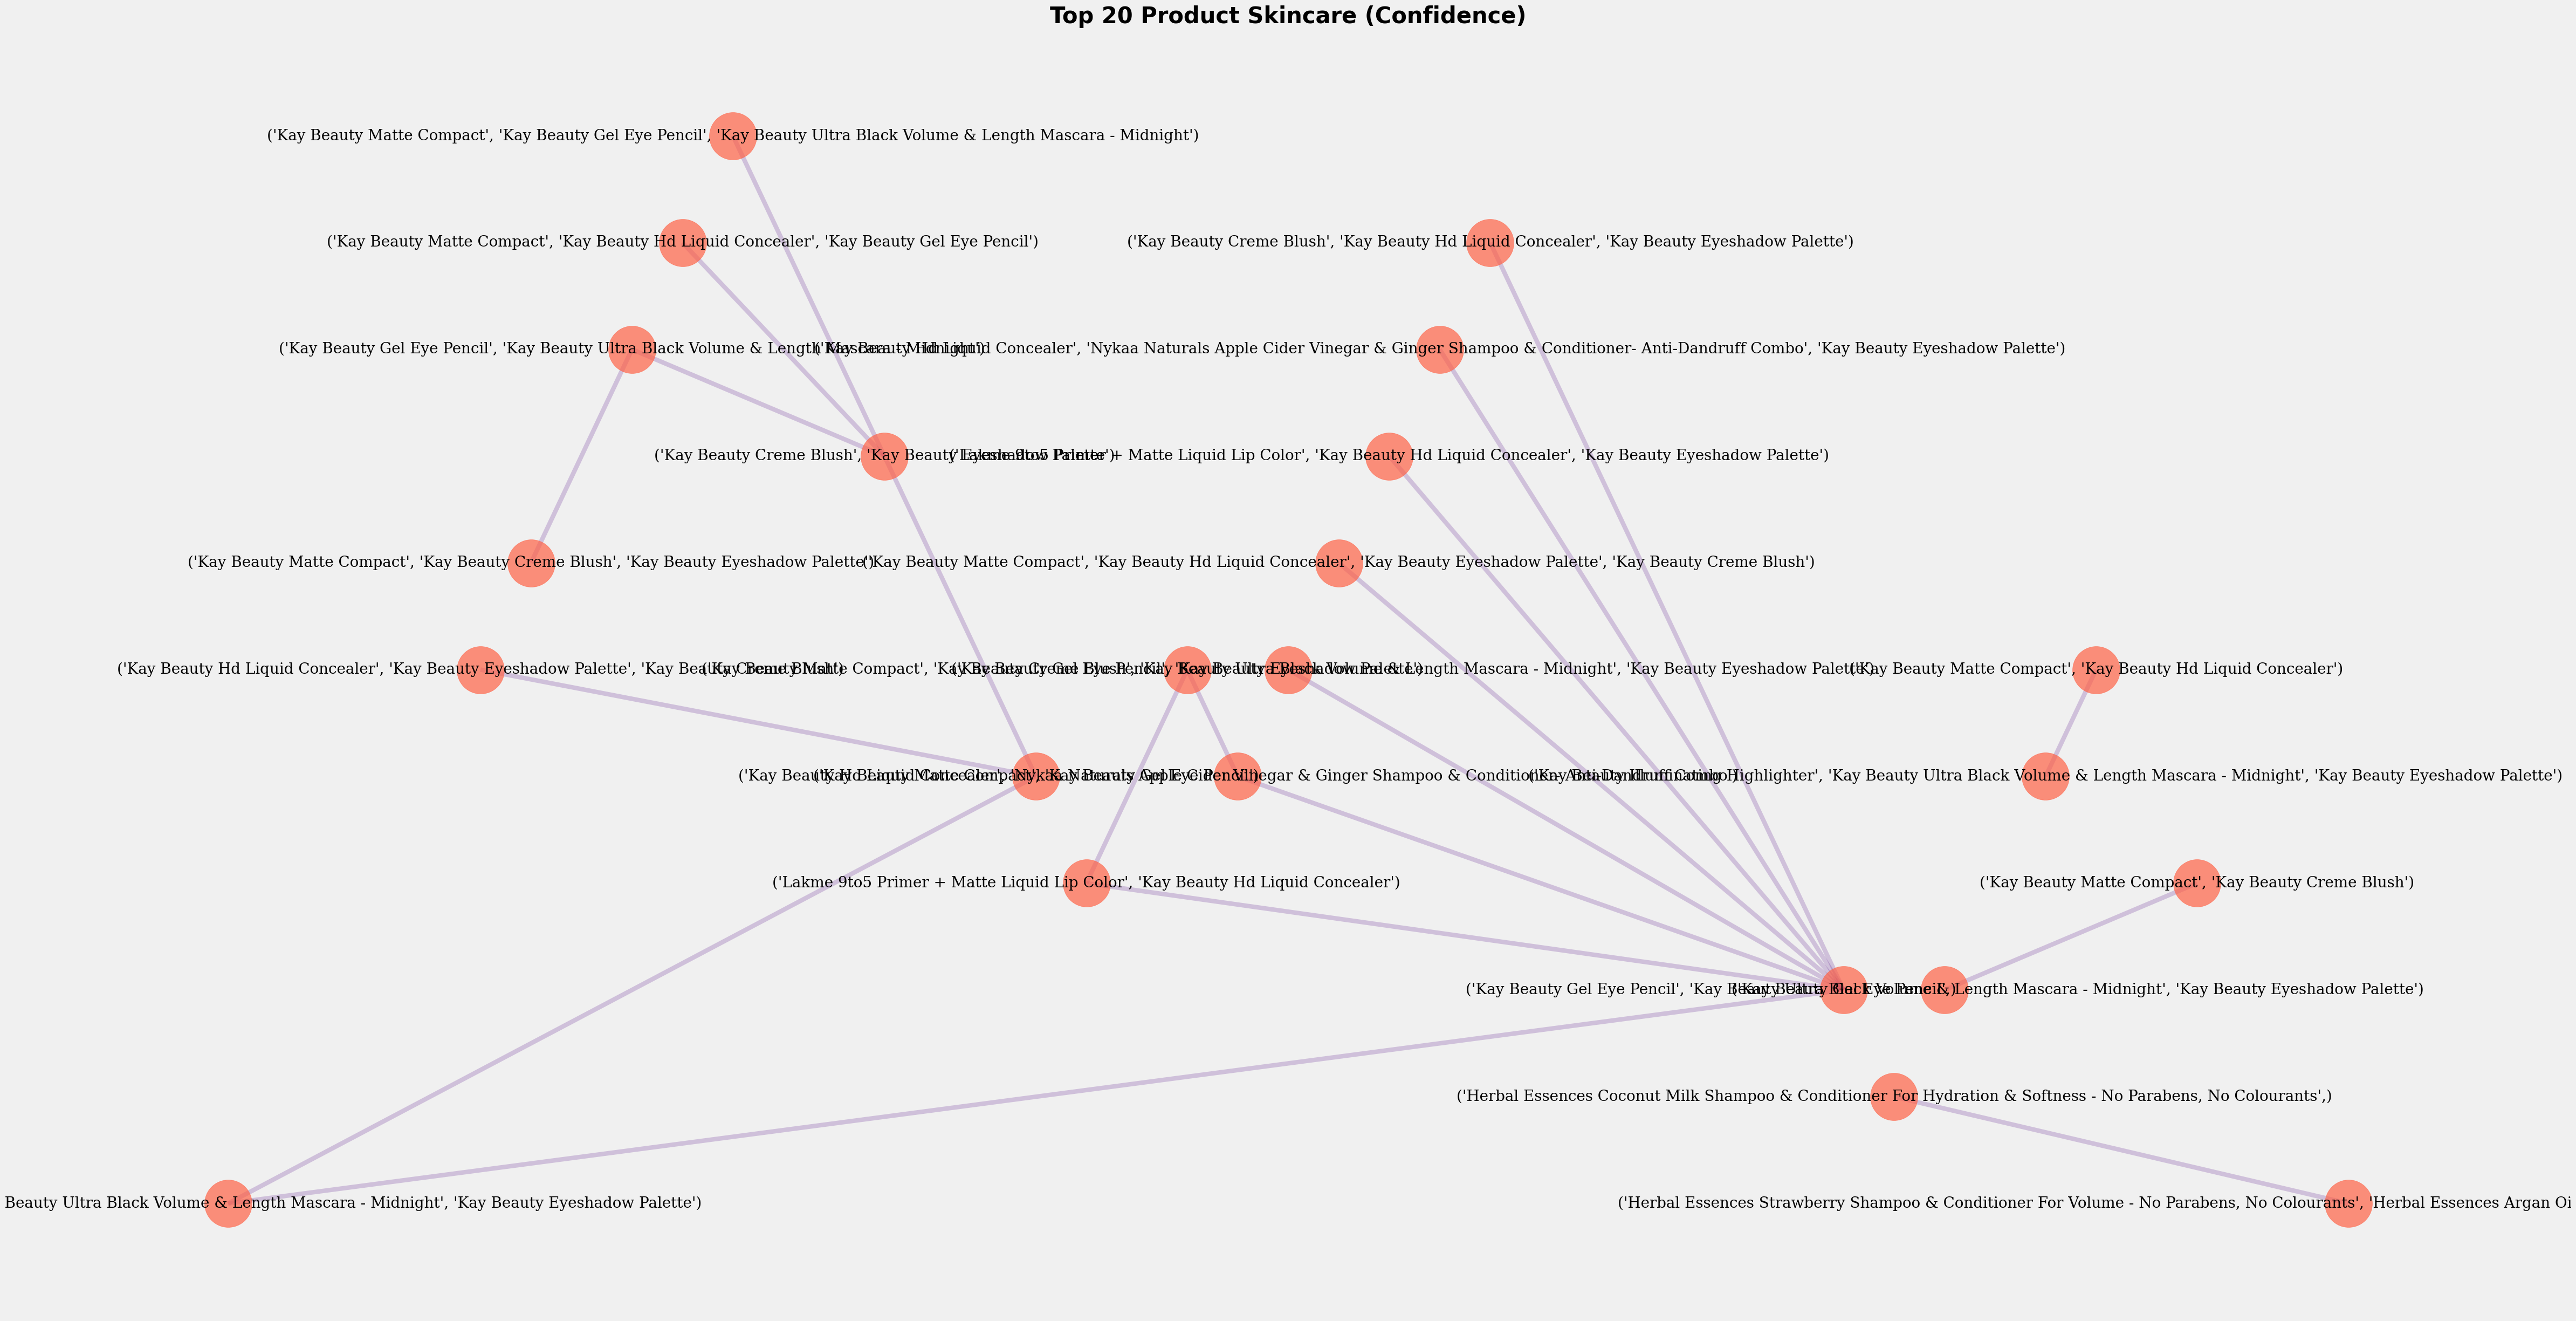

In [ ]:
import networkx as nx
import warnings
# konversi frozenset menjadi tuple
rules['antecedents'] = rules['antecedents'].apply(lambda x: tuple(x))
rules['consequents'] = rules['consequents'].apply(lambda x: tuple(x))

# buat graf menggunakan nx.from_pandas_edgelist()
G = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(20),
                            source='antecedents', target='consequents',
                            edge_attr='lift')
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(20),
                                source='antecedents',target='consequents',
                                edge_attr=None)
plt.subplots(figsize=(48,25))
plt.suptitle('Top 20 Product Skincare (Confidence)',
             fontsize = 30,fontweight = 'bold')
pos = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 4000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(G, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'serif')
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
print("df_reviews shape: ",df_reviews.shape)
print("df_product_info shape: ",df_product_info.shape)


NameError: ignored

In [ ]:
# Mengimpor NLTK dan Proses Tokenisasi
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Mengimpor Program Lemmatisasi
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

In [ ]:
# Preprocessing
words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open()